### NAME: Bùi Phương Thảo
### ID : 11215341
### Class : DSEB 63

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\KyThuat88\Downloads\dataset1.csv")
data

,Unnamed: 0,X1,X2,y
0,0,0.107143,0.603070,1
1,1,0.093318,0.649854,1
2,2,0.097926,0.705409,1
3,3,0.155530,0.784357,1
4,4,0.210829,0.866228,1
...,...,...,...,...
858,858,0.994240,0.516667,1
859,859,0.964286,0.472807,1
860,860,0.975806,0.439474,1
861,861,0.989631,0.425439,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  863 non-null    int64  
 1   X1          863 non-null    float64
 2   X2          863 non-null    float64
 3   y           863 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 27.1 KB


In [4]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'X2')

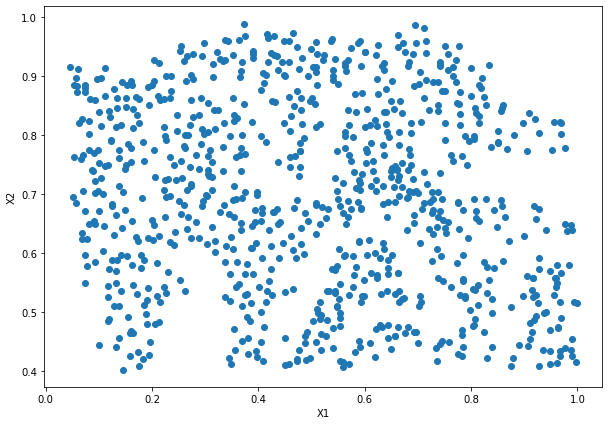

In [6]:
fig,ax = plt.subplots(figsize = (10,7))
#ax = plt.axes(projection='3d')
ax.scatter(data['X1'], data['X2'])
#ax.scatter(data['X2'], color = 'blue')

ax.set_xlabel('X1')
ax.set_ylabel('X2')

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix

In [9]:
import numpy as np

In [10]:
Y = data['y']

In [11]:
X = data.drop('y', axis = 1)

In [12]:
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
#X_test = scaler.transform(X_test)

In [13]:
X

,X1,X2
0,0.107143,0.603070
1,0.093318,0.649854
2,0.097926,0.705409
3,0.155530,0.784357
4,0.210829,0.866228
...,...,...
858,0.994240,0.516667
859,0.964286,0.472807
860,0.975806,0.439474
861,0.989631,0.425439


In [14]:
#X_train, X_test, y_train, y_test = train_test_split(data[data.columns[0:2]].to_numpy(),data['y'], random_state=0)
#svc = LinearSVC()
svm = SVC(gamma='auto', kernel ='linear',probability = True)
svm.fit(X, Y)

SVC(gamma='auto', kernel='linear', probability=True)

In [15]:
y_pred = svm.predict(X)

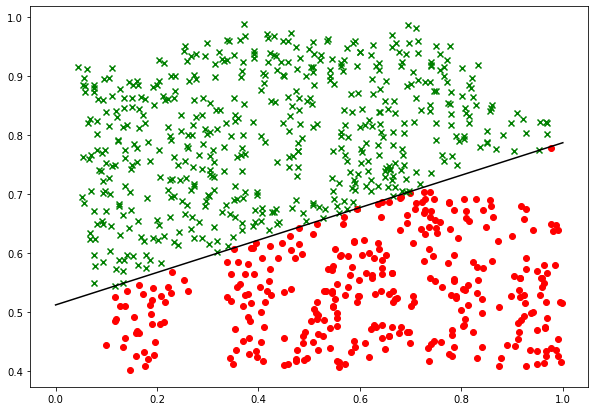

In [16]:
fig, ax1 = plt.subplots(figsize = (10,7))
w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0,1)
yy = a * xx - svm.intercept_[0]/w[1]
y_am = a * xx - svm.intercept_[0]/w[1] + 1
y_cong = a * xx - svm.intercept_[0]/w[1] - 1
ax1.plot(xx,yy,color = 'black', label = 'Decision boundary')
# ax1.plot(xx, y_am, color = 'green', label = '-1')
# ax1.plot(xx,y_cong, color = 'red', label = '+1')
for i in range(data.shape[0]):
    if y_pred[i] == 0:
        ax1.scatter(np.array(X)[i][0], np.array(X)[i][1],color='red', marker='o', label='negative')
    else:
        ax1.scatter(np.array(X)[i][0], np.array(X)[i][1],color='green', marker='x', label='positive')
#ax1.legend()

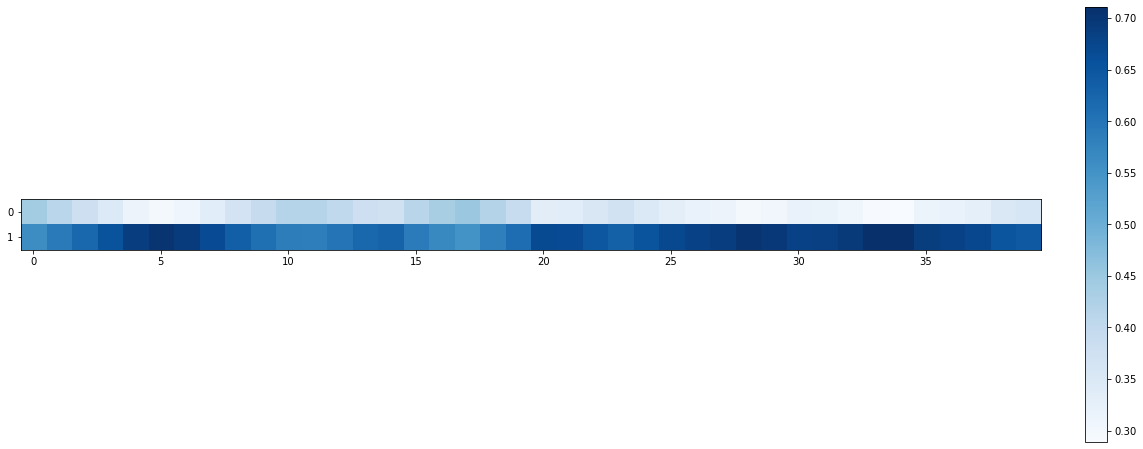

In [17]:
pred = svm.predict_proba(X)[:40]
fig, ax = plt.subplots(figsize= (20,8))
im = ax.imshow(pred.T, cmap='Blues')
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04) 

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5689455388180765


In [19]:
# EX2

In [20]:
heart = pd.read_csv(r"C:\Users\KyThuat88\Downloads\archive\heart.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [21]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [22]:
from sklearn.model_selection import train_test_split
y = heart["target"]
X = heart.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
y_test.unique()

array([1, 0], dtype=int64)

In [24]:
y_train

360    1
228    1
706    0
501    1
119    1
      ..
423    0
121    0
357    0
700    1
870    1
Name: target, Length: 820, dtype: int64

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

Accuracy of Logistic Regression: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       103
           1       0.86      0.90      0.88       102

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [28]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_acc_score = accuracy_score(y_test, nb_pred)
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nb_pred))

Accuracy of Naive Bayes model: 82.92682926829268 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.83      0.82      0.83       102

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



In [29]:
m3 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_acc_score = accuracy_score(y_test, svc_predict)
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predict))

Accuracy of Support Vector Classifier: 96.58536585365853 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       103
           1       0.98      0.95      0.97       102

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

